In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
#getting S2N graph data from csv

results = []
with open("cleanedData.csv") as csvfile:
    reader = csv.reader(csvfile) # change contents to floats
    for row in reader: # each row is a list
        results.append(row)
        
#casting data to ints
data = np.zeros([45,3])
for r in range(45):
    for c in range(3):
        data[r][c] = int(results[r][c])

In [4]:
#storing data in separate arrays
idx = []
s2n = []
distances = []
for i in range(len(data)):
    idx.append(data[i][0])
    s2n.append(data[i][1])
    distances.append(data[i][2])

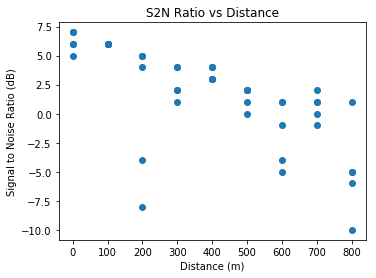

In [5]:
#plotting S2N over distance as a scatter plot
plt.figure(figsize=[5.5,4])
plt.scatter(distances,s2n)
plt.xlabel('Distance (m)')
plt.ylabel('Signal to Noise Ratio (dB)')
plt.title('S2N Ratio vs Distance')
plt.savefig('s2nscatter.svg')

In [6]:
#calculating median and standard deviation of S2N data at each distance
distances = [0,100,200,300,400,500,600,700,800]
averages = []
stdevs = []
for i in range(9):
    arr = s2n[5*i:5*i+5]
    avg = np.median(arr)
    stdev = np.std(arr)
    averages.append(avg)
    stdevs.append(stdev)

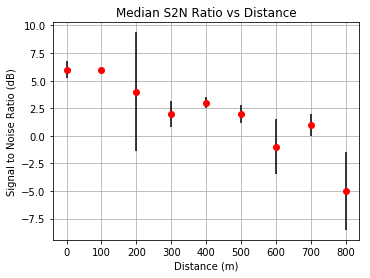

In [23]:
#plotting median S2N over distance, with error bars on S2N
plt.figure(figsize=[5.5,4])
plt.errorbar(distances,averages, stdevs, fmt='or', ecolor='k')
plt.xlabel('Distance (m)')
plt.ylabel('Signal to Noise Ratio (dB)')
plt.title('Median S2N Ratio vs Distance')
plt.grid(True)
plt.savefig('s2nmedian.svg')

In [ ]:
#function used to make a polynomial regression
def poly_regression(x,y, order):
    y = np.array(y)
    
    X = np.zeros([len(x),order+1])
    
    for row in range(len(x)):
        for col in range(order+1):
            X[row,col]=x[row]**col
    
    y=y.reshape(-1,1)
    pt = y.T @ X @ np.linalg.inv(X.T @ X)
    
    return pt.T

#function returning a function handle used for plotting
#also prints the coeffiicents of the polynomial of the equation
def makeLinRegression(xdata, ydata):
    p = poly_regression(xdata,ydata,1)
    print('p vector: {}'.format(p))
    def linReg(x):
        y = 0
        for i in range(len(p)):
            y+=p[i]*x**i
        return y
        
    return linReg

In [8]:
#Fuction to plot 2 data sets against eachother - used for temperature calibration trials
#takes in a filename for true temperature values, a filename for pysense temperature values,
#a title for the chart, a min and max to plot a fitting function, and a function handle for fititng
#if no function handle is given, a linear regression is automatically calculated

def plot2Temps(accurateDataFileName, pysenseDataFileName, chartTitle = 'real temperature vs pysense temperature',
               plotMin=0, plotMax=0, plotFunction = None):
    
    #reading accurate data
    accData = []
    with open(accurateDataFileName) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            accData.append(row)
    #casting as floats
    accTemps = []
    for t in accData:
        accTemps.append(float(t[0]))
    
    #reading pysense data
    pysenseData = []
    with open(pysenseDataFileName) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            pysenseData.append(row)
    #casting as floats
    pysenseTemps = []
    for t in pysenseData:
        pysenseTemps.append(float(t[0]))
    
    #plotting as a scatter plot
    plt.figure(figsize=[5.5,4])
    plt.scatter(pysenseTemps, accTemps, marker = '.')
    plt.xlabel('temperature gathered from pysense (°C)')
    plt.ylabel('real temperature (°C)')
    plt.title(chartTitle)
    
    #calculating linear regression if no function is given
    if plotFunction == None:
        linReg = makeLinRegression(pysenseTemps, accTemps)
        funX = np.linspace(plotMin, plotMax, 51)
        funY = []
        for x in funX:
            funY.append(linReg(x))
    
    #plotting given function
    else:
        funX = range(plotMin, plotMax)
        funY = []
        for x in funX:
            funY.append(plotFunction(x))
    
    plt.grid(True)
    plt.plot(funX, funY, 'r')

In [30]:
#plotting a single temperature dataset, given a filename

def plotTempOverTime(tempDataFileName):
    #getting data from csv
    data = []
    with open(tempDataFileName) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            data.append(row)
    
    #casting as floats
    temps = []
    for t in data:
        temps.append(float(t[0]))
    
    #plotting
    plt.grid(True)
    plt.plot(temps, marker = '.')

p vector: [[-10.97481029]
 [  1.30181342]]


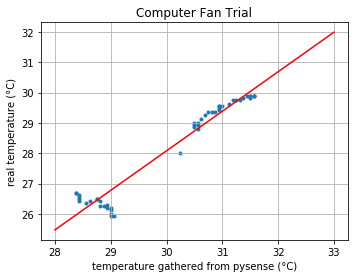

In [32]:
#computer fan trial graph

plot2Temps('accurateTempData.csv', 'pysenseTempData.csv', 'Computer Fan Trial', 28, 33, None)
plt.grid(True)
plt.savefig('computerFanTempGraph.svg')

p vector: [[-14.7631898 ]
 [  1.50154513]]


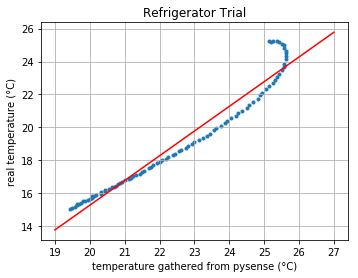

In [33]:
#fridge trial graph

plot2Temps('accurateColdTempData.csv', 'pysenseColdTempData.csv', 'Refrigerator Trial', 19, 27, None)
plt.savefig('fridgeTempGraph.svg')